<a href="https://colab.research.google.com/github/sujalneu/assignment-1/blob/main/2408272_SujalNeupane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
#Exercises:
#1.Data Exploration and Understanding:
#Dataset Overview:
#1. Load the dataset and display the first 10 rows.
df=pd.read_csv('/content/drive/MyDrive/datasets/WHR-2024-5CS037.csv')
print("the first 10 rows:- \n")
print(df.head(10))
print()

#2. Identify the number of rows and columns in the dataset.
row=len(df.index)
print(f"no of row = {row}.")
columns=len(df.columns)
print(f"no of columns = {columns}.")
print()

#3. List all the columns and their data types.
print("All the columns and their data types :- ")
print(df.dtypes)

the first 10 rows:- 

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                 

In [ ]:
# 1. Calculate the mean, median, and standard deviation for the Score column.
mean=df['score'].mean()
median=df['score'].median()
standard_deviation=df['score'].std()
print(f"the mean is {mean}.")
print(f"the median is {median}.")
print(f"the standard deviation is {standard_deviation}.")

# 2. Identify the country with the highest and lowest happiness scores.
h_value_country=df.loc[df['score'].idxmax(), 'Country name']
l_value_country=df.loc[df['score'].idxmin(), 'Country name']
print(f"The Highest value is {h_value_country} and lowest value is {l_value_country}.")

the mean is 5.52758041958042.
the median is 5.785.
the standard deviation is 1.1707165099442995.
The Highest value is Finland and lowest value is Afghanistan.


In [ ]:
# 1. Check if there are any missing values in the dataset. If so, display the total count for each column.
print("missing values in the dataset:-")
missing_values = df.isnull().sum()

if missing_values.any():
    print(missing_values)
else:
    print("No missing values in the dataset.")

missing values in the dataset:-
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
#1. Filter the dataset to show only the countries with a Score greater than 7.5.
filter_score=df[df['score']>7.5]
print("the countries with a Score greater than 7.5 is :- \n")
print(filter_score)

#2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.
descend=filter_score.sort_values('Log GDP per capita', ascending=False).head(10)
print("THE GDP per Capita in descending order and 10 rows :- \n")
print(descend)

the countries with a Score greater than 7.5 is :- 

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  
THE GDP per Capita in descending order and 10 rows :- 

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525       

In [ ]:
#1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
#Low − (Score < 4)
#Medium − (4 ≤ Score ≤ 6)
#High − (Score > 6)
def score_stats(value):
  if value < 4 :
    return "Low"
  elif  4<= value <=6 :
    return "Medium"
  elif value > 6:
    return "high"

df['Happiness']=df['score'].map(score_stats)
print(df[['Country name','score', 'Happiness']].head())


  Country name  score Happiness
0      Finland  7.741      high
1      Denmark  7.583      high
2      Iceland  7.525      high
3       Sweden  7.344      high
4       Israel  7.341      high


<ipython-input-80-d316b27f1169>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name',y='score',data=top_10_happiest, palette='inferno')


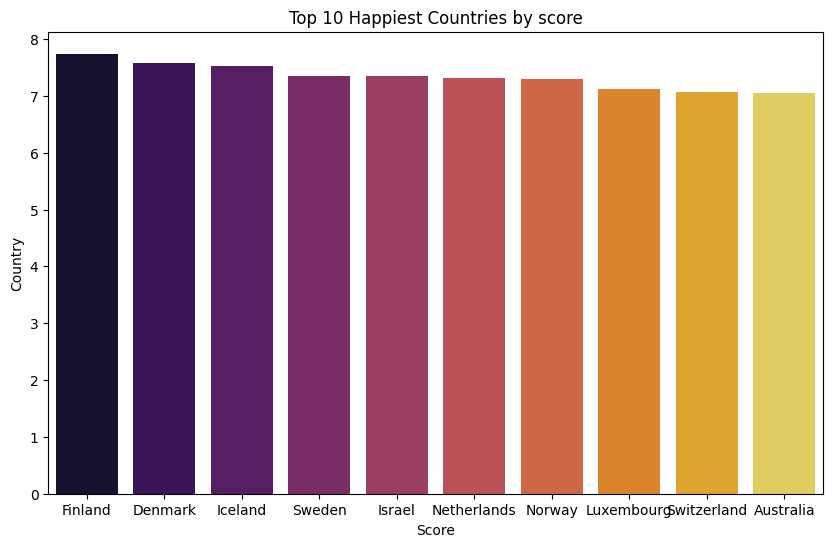

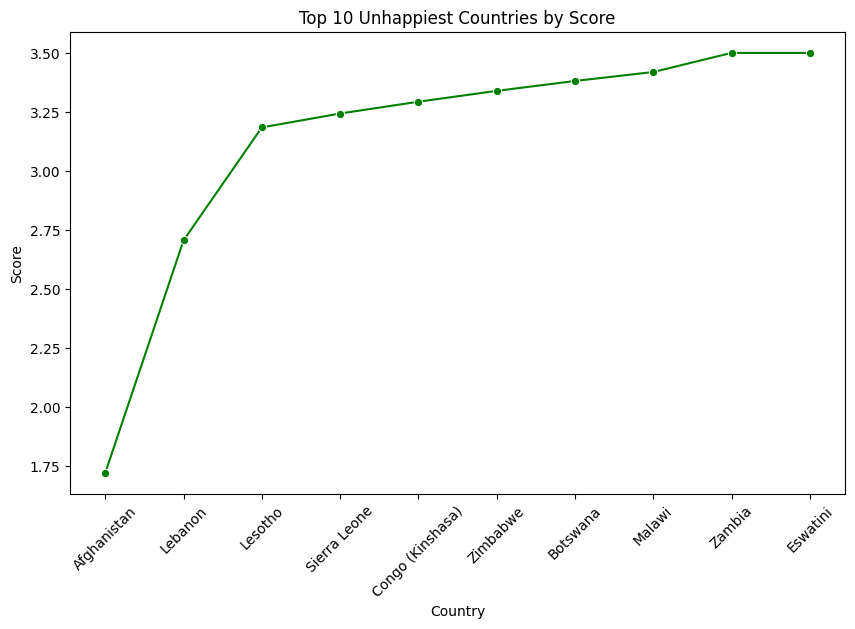

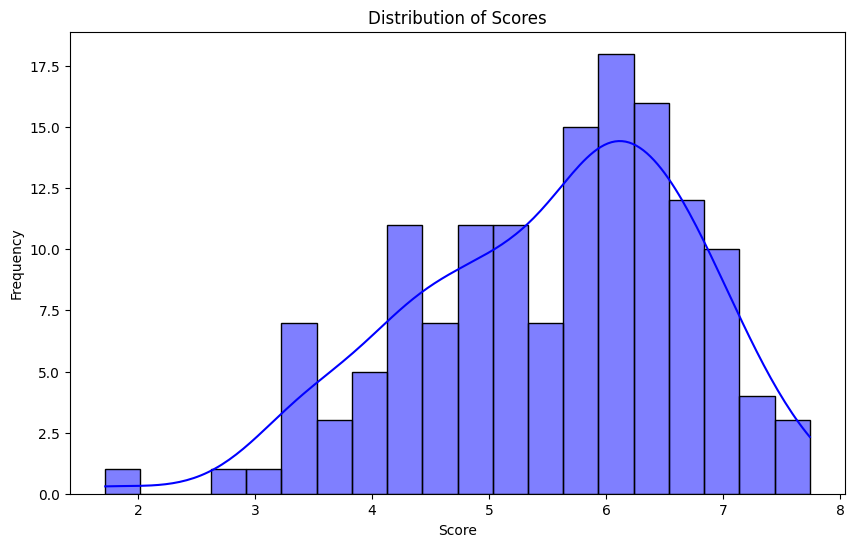

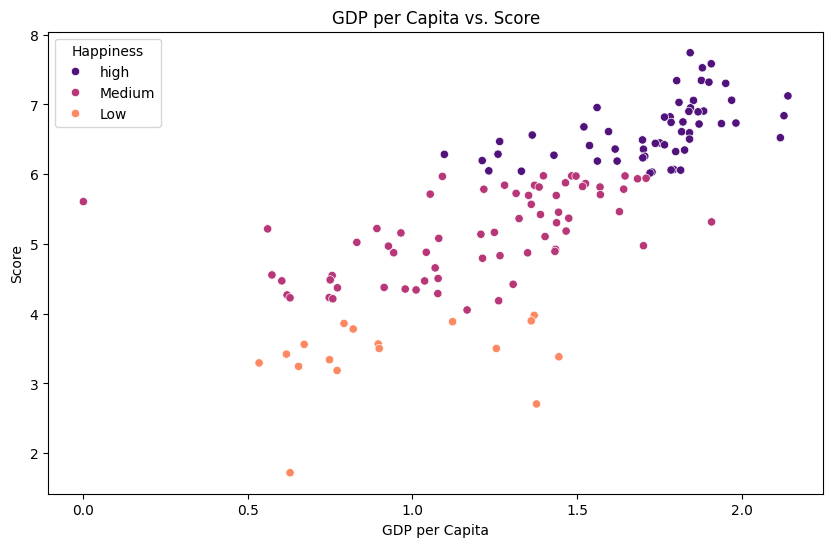

In [80]:
#Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
top_10_happiest=df.nlargest(10,'score')
plt.figure(figsize=(10,6))
sns.barplot(x='Country name',y='score',data=top_10_happiest, palette='inferno')
plt.title('Top 10 Happiest Countries by score')
plt.xlabel('Score')
plt.ylabel('Country')
plt.show()

#Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
top_10_unhappiest=df.nsmallest(10,'score')
plt.figure(figsize=(10,6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest, marker='o', color='green')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

#Plot a histogram for the Score column to show its distribution and also interpret.
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], kde=True, bins=20, color='blue')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

#Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score',hue='Happiness', data=df, palette='magma')
plt.title('GDP per Capita vs. Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.show()

In [ ]:
#3.2 Problem - 2 - Some Advance Data Exploration Task:
#Task - 1 - Setup Task - Preparing the South-Asia Dataset:
# 1. Define the countries in South Asia with a list for example:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]
# 2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
south_asia = df[df['Country name'].isin(south_asian_countries)]
# 3. Save the filtered dataframe as separate CSV files for future use.
south_asia.to_csv('/content/south_asia_dataset.csv',index=False)

print(south_asia.head(6))

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

Ranking the South Asian countries based on the Composite Score in descending order. 
  Country name  Composite Score
3    Sri Lanka           1.0739
0        Nepal           0.8159
2        India           0.7874
1     Pakistan           0.7039
4   Bangladesh           0.6774
5  Afghanistan           0.3238


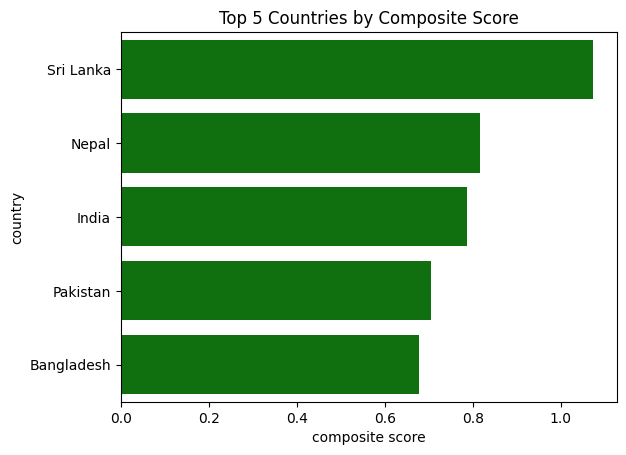

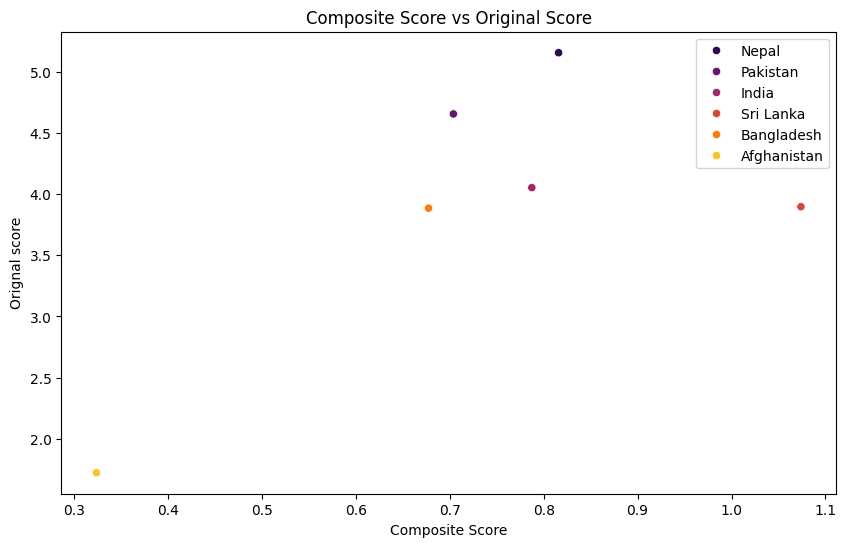

In [82]:
#Task - 2 - Composite Score Ranking:
# 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:
# Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
df2=pd.read_csv('/content/south_asia_dataset.csv')
df2['Composite Score']=0.40 * df2['Log GDP per capita'] + 0.30 * df2['Social support']+0.30 * df2['Healthy life expectancy']


# 2. Rank the South Asian countries based on the Composite Score in descending order.
descending_order=df2.sort_values('Composite Score', ascending=False)
print("Ranking the South Asian countries based on the Composite Score in descending order. ")
print(descending_order[['Country name','Composite Score']])

# 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
sns.barplot(data=descending_order.head(5),x='Composite Score',y='Country name' ,color='green')
plt.xlabel('composite score')
plt.title('Top 5 Countries by Composite Score')
plt.ylabel('country')
plt.show()
print()
# 4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Composite Score', y='score', hue='Country name', palette='inferno')
plt.title('Composite Score vs Original Score')
plt.xlabel('Composite Score')
plt.ylabel('Orignal score')
plt.legend()
plt.show()

In [ ]:
# 4.Discuss whether the rankings based on the Composite Score align with the original Score -
#   support your discussion with some visualization plot.

#-> The given scatterplot comparing the Composite Score and the Original Score shows a generally positive relationship,
# indicating that countries with higher Composite Scores tend to have higher Original Scores.
# However, some variations exist, suggesting that while the Composite Score incorporates GDP per capita,
# social support, and healthy life expectancy, the Original Score may account for additional factors.
# For instance, countries like India and Pakistan show a strong alignment between their Composite and Original Scores,
# while others, such as Afghanistan, with lower Composite Scores, also reflect this in their Original Scores.
# Overall, the rankings are fairly consistent, but minor discrepancies highlight the influence of other variables on the Original Score.

the outliers countries in south asia is : 
5    Afghanistan
Name: Country name, dtype: object


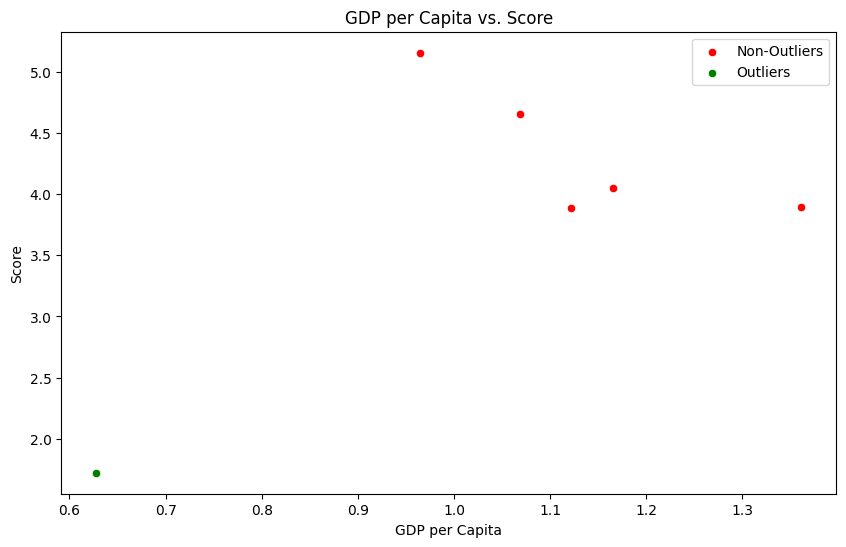

In [ ]:
# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

Q1_score = df2['score'].quantile(0.25)
Q3_score = df2['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = df2['Log GDP per capita'].quantile(0.25)
Q3_gdp = df2['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# 2. Define outliers using the 1.5 × IQR rule
score_outliers = df2[(df2['score'] < (Q1_score - 1.5 * IQR_score)) |
                                (df2['score'] > (Q3_score + 1.5 * IQR_score))]

gdp_outliers = df2[(df2['Log GDP per capita'] < (Q1_gdp - 1.5 * IQR_gdp)) |
                               (df2['Log GDP per capita'] > (Q3_gdp + 1.5 * IQR_gdp))]

outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()
outlier_country = outliers['Country name']
print("the outliers countries in south asia is : ")
print(outlier_country)
# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df2, color='red', label='Non-Outliers')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='green', label='Outliers')
plt.title('GDP per Capita vs. Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()


In [ ]:
# Discuss the characteristics of these outliers and their potential impact on regional averages.


-> The identified outlier in South Asia exhibits significantly low values for both GDP per Capita and Score compared to other countries in the region. Its economic challenges, reflected by a low GDP per Capita, likely contribute to its low score, indicating poor overall well-being or development. This outlier skews regional averages downward, potentially misrepresenting the overall progress of South Asia. Excluding this outlier from the analysis would result in a higher average for both GDP per Capita and Score, offering a clearer picture of regional trends without the influence of extreme values.

the correlation between Freedom to Make Life Choices with the Score is : 0.8005185224163315
the correlation between Generosity with the Score is : 0.874512371253192


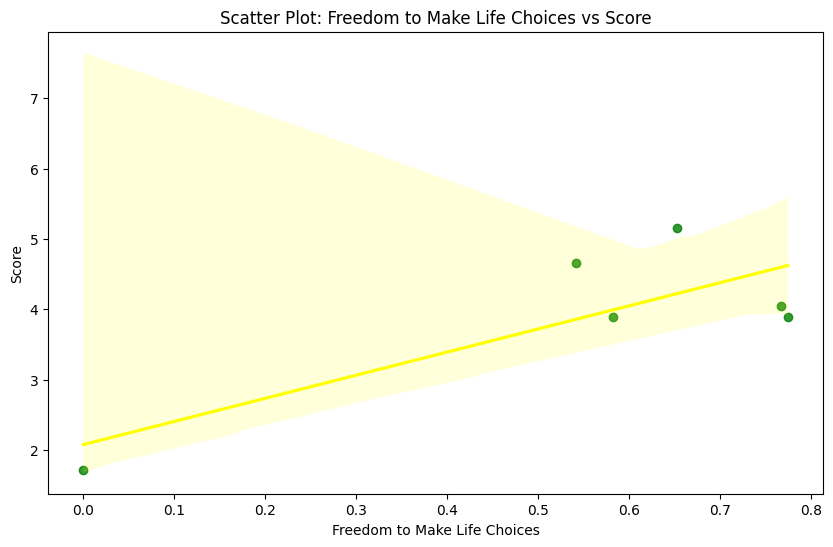

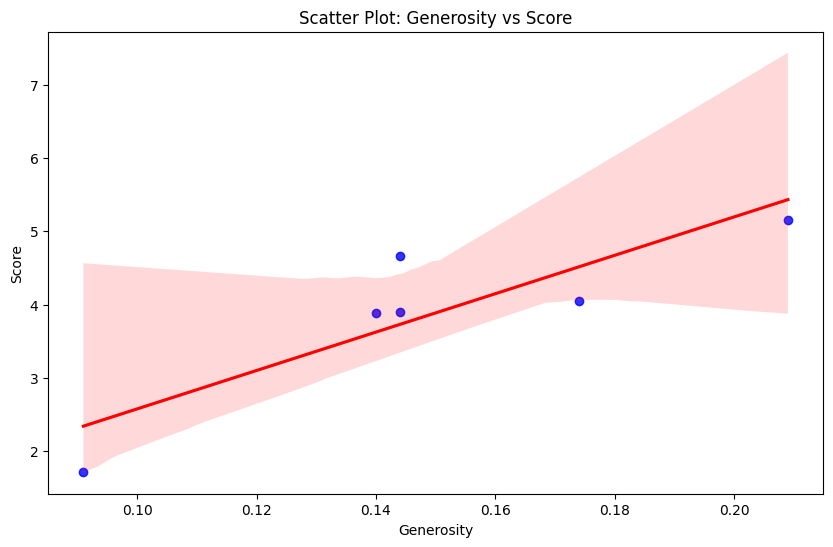

In [84]:
#Task - 4 - Exploring Trends Across Metrics:
#1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.
freedom_correlation = df2['Freedom to make life choices'].corr(df2['score'])
generosity_correlation = df2['Generosity'].corr(df2['score'])
print(f"the correlation between Freedom to Make Life Choices with the Score is : {freedom_correlation}")
print(f"the correlation between Generosity with the Score is : {generosity_correlation}")
#2. Create scatter plots with trendlines for these metrics against the Score.
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=df2, scatter_kws={'color':'green'}, line_kws={'color':'yellow'})
plt.title('Scatter Plot: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=df2, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Scatter Plot: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()


In [ ]:
#3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.



-> Based on the calculations, Generosity has the stronger relationship with the Score, exhibiting a Pearson correlation of 0.87, while Freedom to Make Life Choices shows a slightly weaker correlation of 0.80. Both metrics demonstrate a positive trend with the Score, meaning that higher levels of Generosity and Freedom to Make Life Choices generally correspond to higher scores in South Asian countries. However, the stronger correlation with Generosity indicates that this metric has a more direct or pronounced association with the Score. The scatter plots also support this conclusion, with a clearer positive trend in the Generosity scatter plot compared to the Freedom to Make Life Choices scatter plot.

Ranking the South Asian countries by this gap in both descending order.

  Country name  GDP-Score gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764
Ranking the South Asian countries by this gap in both ascending order. 

  Country name  GDP-Score gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888


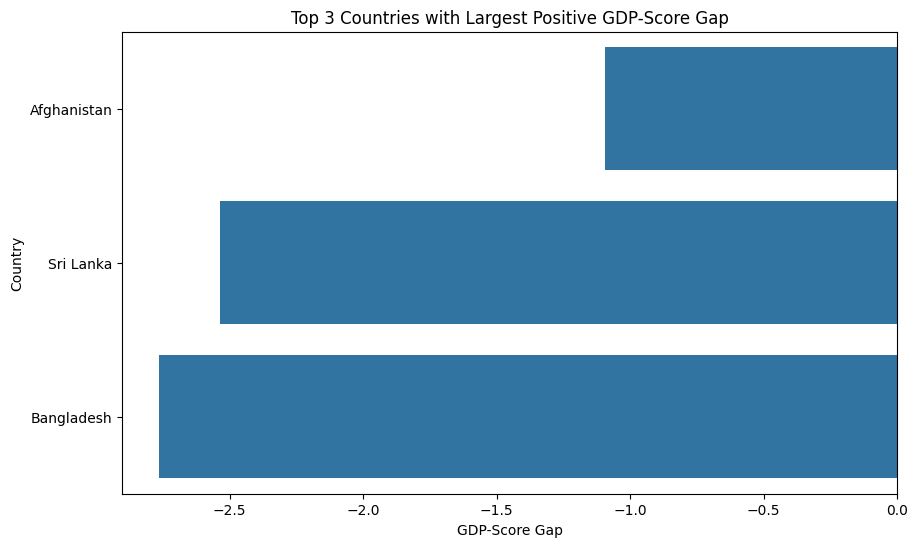

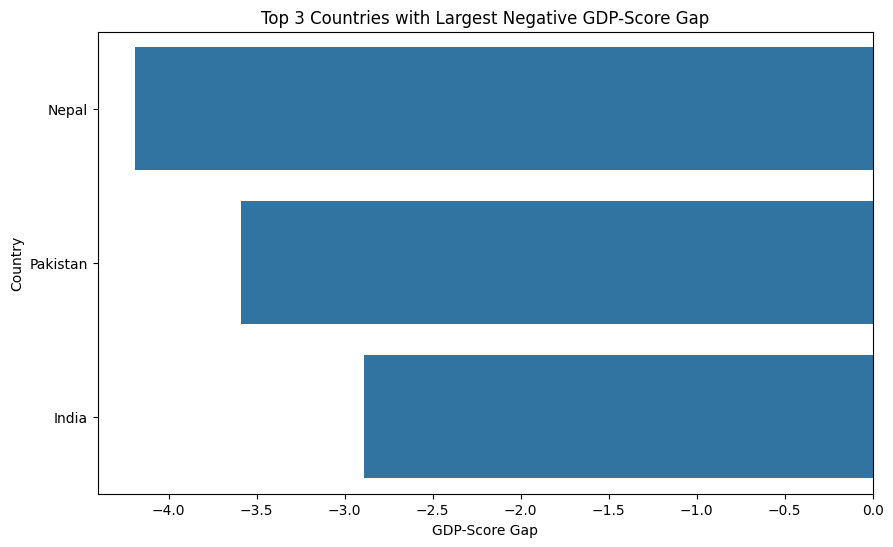

In [ ]:
# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
#for each South Asian country.
df2['GDP-Score gap']=df2['Log GDP per capita']-df2['score']

# 2. Rank the South Asian countries by this gap in both ascending and descending order.
descending_order=df2[['Country name', 'GDP-Score gap']].sort_values(by='GDP-Score gap', ascending=False)
print("Ranking the South Asian countries by this gap in both descending order.\n")
print(descending_order.head(3))
aescending_order=df2[['Country name', 'GDP-Score gap']].sort_values(by='GDP-Score gap', ascending=True)
print("Ranking the South Asian countries by this gap in both ascending order. \n")
print(aescending_order.head(3))
# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
top_3_postive=df2.nlargest(3,'GDP-Score gap')
top_3_negative=df2.nsmallest(3,'GDP-Score gap')
top_3=pd.concat([top_3_postive,top_3_negative])
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score gap', y='Country name', data=top_3_postive)
plt.title('Top 3 Countries with Largest Positive GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score gap', y='Country name', data=top_3_negative)
plt.title('Top 3 Countries with Largest Negative GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()




#4. Analyze the reasons behind these gaps and their implications for South Asian countries.
-> The GDP-Score gap reveals key insights into the economic and development disparities among South Asian countries. For instance, countries with the largest negative gaps like Nepal (-4.193), Pakistan (-3.588), and India (-2.888) indicate lower economic output relative to their score, possibly due to issues like political instability, poverty, or underdeveloped infrastructure despite significant population sizes or human capital. Conversely, smaller negative gaps in Afghanistan (-1.093) or Sri Lanka (-2.537) suggest slightly better alignment between GDP and score, which might stem from relatively more effective governance, remittance inflows, or strategic investments. The implications of these gaps are significant—narrowing them would require boosting GDP per capita through economic reforms, improved education, technological advancements, and poverty alleviation policies while enhancing sustainability. Addressing these gaps is crucial for South Asia to achieve equitable growth and better living standards.



3.3 Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

In [67]:
#1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
#following list:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

middle_east = df[df['Country name'].isin(middle_east_countries)]
middle_east.to_csv('/content/middle_east.csv',index=False)
df3=pd.read_csv('/content/middle_east.csv')
print(df3.head())

           Country name  score  Log GDP per capita  Social support  \
0                Israel  7.341               1.803           1.513   
1                Kuwait  6.951               1.845           1.364   
2  United Arab Emirates  6.733               1.983           1.164   
3          Saudi Arabia  6.594               1.842           1.361   
4               Bahrain  5.959                 NaN             NaN   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.740                         0.641       0.153   
1                    0.661                         0.827       0.200   
2                    0.563                         0.815       0.209   
3                    0.511                         0.787       0.114   
4                      NaN                           NaN         NaN   

   Perceptions of corruption  Dystopia + residual Happiness  
0                      0.193                2.298      high  
1                     

In [68]:
#1 Descriptive Statistics:
# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
south_asia_mean=df2['score'].mean()
south_asia_standard_deviation=df2['score'].std()
print(f"In south asia, the mean of the score is {south_asia_mean} and the standarad deviation is {south_asia_standard_deviation} ")
middle_east_mean=df3['score'].mean()
middle_east_standard_deviation=df3['score'].std()
print(f"In middle east, the mean of the score is {middle_east_mean} and the standarad deviation is {middle_east_standard_deviation} ")
# • Which region has higher happiness Scores on average?
if(south_asia_mean>middle_east_mean):
  print("The south asia have higher happiness Scores on average. ")
else:
  print("The middle east have higher happiness Scores on average.")

In south asia, the mean of the score is 3.895666666666667 and the standarad deviation is 1.1770690152521504 
In middle east, the mean of the score is 5.412100000000001 and the standarad deviation is 1.5662011684327144 
The middle east have higher happiness Scores on average.


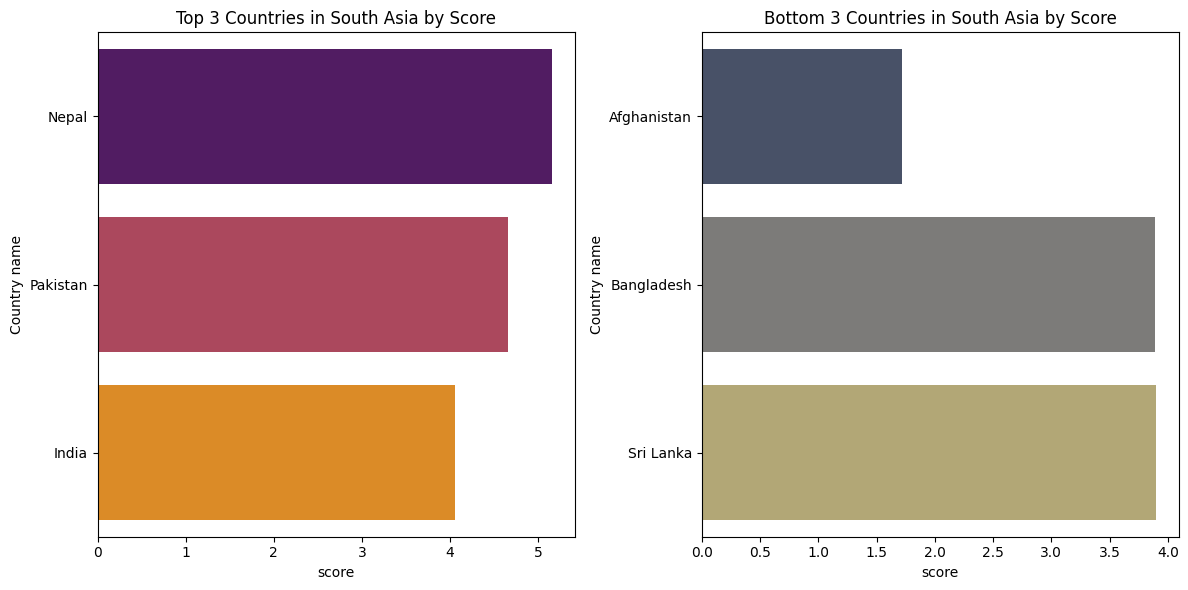

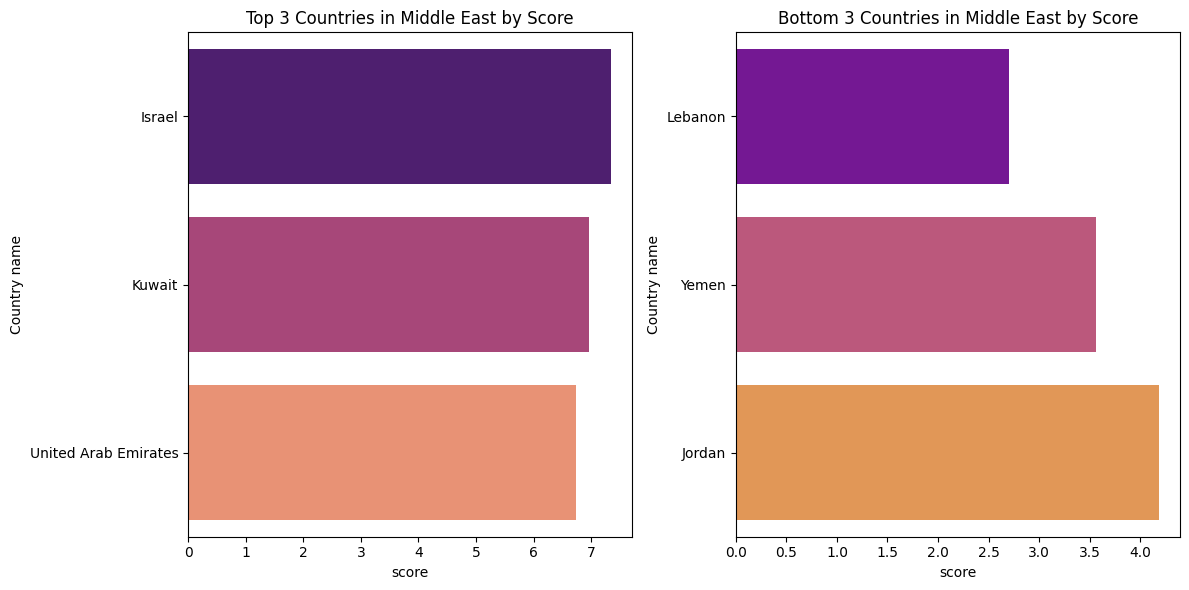

In [86]:
#2. Top and Bottom Performers:
#• Identify the top 3 and bottom 3 countries in each region based on the score.

top_3_southAsia=df2[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
bottom_3_southAsia=df2[['Country name', 'score']].sort_values(by='score').head(3)
top_3_middleEast=df3[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
bottom_3_middleEast=df3[['Country name', 'score']].sort_values(by='score').head(3)

#• Plot bar charts comparing these charts.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=top_3_southAsia, hue='Country name', palette='inferno', legend=False)
plt.title('Top 3 Countries in South Asia by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=bottom_3_southAsia, hue='Country name', palette='cividis', legend=False)
plt.title('Bottom 3 Countries in South Asia by Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=top_3_middleEast, hue='Country name', palette='magma', legend=False)
plt.title('Top 3 Countries in Middle East by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=bottom_3_middleEast, hue='Country name', palette='plasma', legend=False)
plt.title('Bottom 3 Countries in Middle East by Score')

plt.tight_layout()
plt.show()

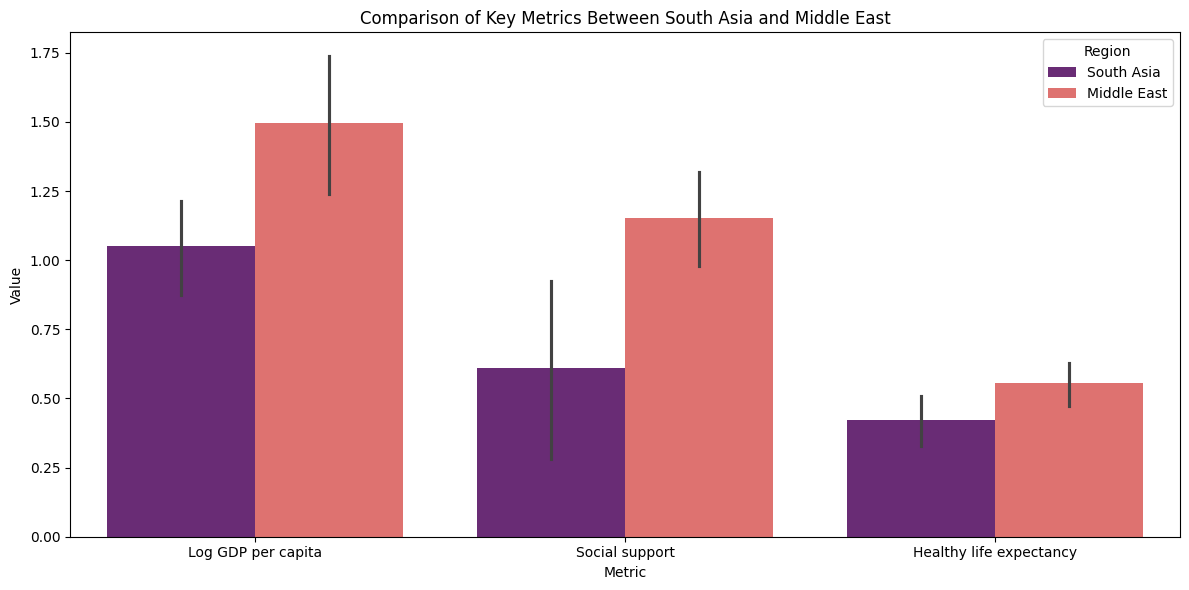

the Social Support show the largest disparity between two region.


In [87]:
#3. Metric Comparisons:
#• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
#between the regions using grouped bar charts.
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

metrics_south_asia = df2[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')
metrics_middle_east = df3[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')

metrics_south_asia['Region'] = 'South Asia'
metrics_middle_east['Region'] = 'Middle East'

comparison_df = pd.concat([metrics_south_asia, metrics_middle_east]).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=comparison_df, palette='magma')

plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

#• Which metrics show the largest disparity between the two regions?
print("the Social Support show the largest disparity between two region.")

In [71]:
#4. Happiness Disparity:
#• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
range_south_asia=df2['score'].max()-df2['score'].min()
range_middle_east=df3['score'].max()-df3['score'].min()
print(f"the range (max - min) of south asia is {range_south_asia}")
print(f"the range (max - min) of middle east is {range_middle_east}")


cv_south_asia=df2['score'].std()/df2['score'].mean()
print(f"the CV of south asia is {cv_south_asia}. ")

cv_south_middle_east=df3['score'].std()/df3['score'].mean()
print(f"the CV of middle east is {cv_south_middle_east}. ")

#• Which region has greater variability in happiness?
if cv_south_asia > cv_south_middle_east:
    print("South Asia has greater relative variability in happiness based on the CV.")
else:
    print("The Middle East has greater relative variability in happiness based on the CV.")


the range (max - min) of south asia is 3.4370000000000003
the range (max - min) of middle east is 4.634
the CV of south asia is 0.3021482883337427. 
the CV of middle east is 0.28938880812119405. 
South Asia has greater relative variability in happiness based on the CV.


THE correlation between Freedom to Make Life Choices and Generosity with the Score in south aisa : 
score                           1.000000
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64
THE correlation between Freedom to Make Life Choices and Generosity with the Score in the middle east : 
score                           1.000000
Freedom to make life choices    0.863220
Generosity                      0.627524
Name: score, dtype: float64


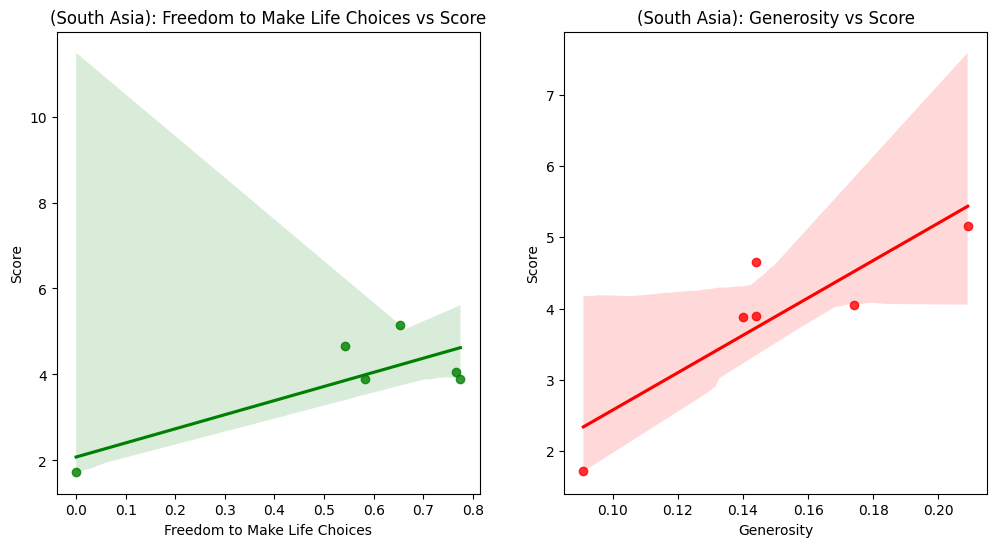

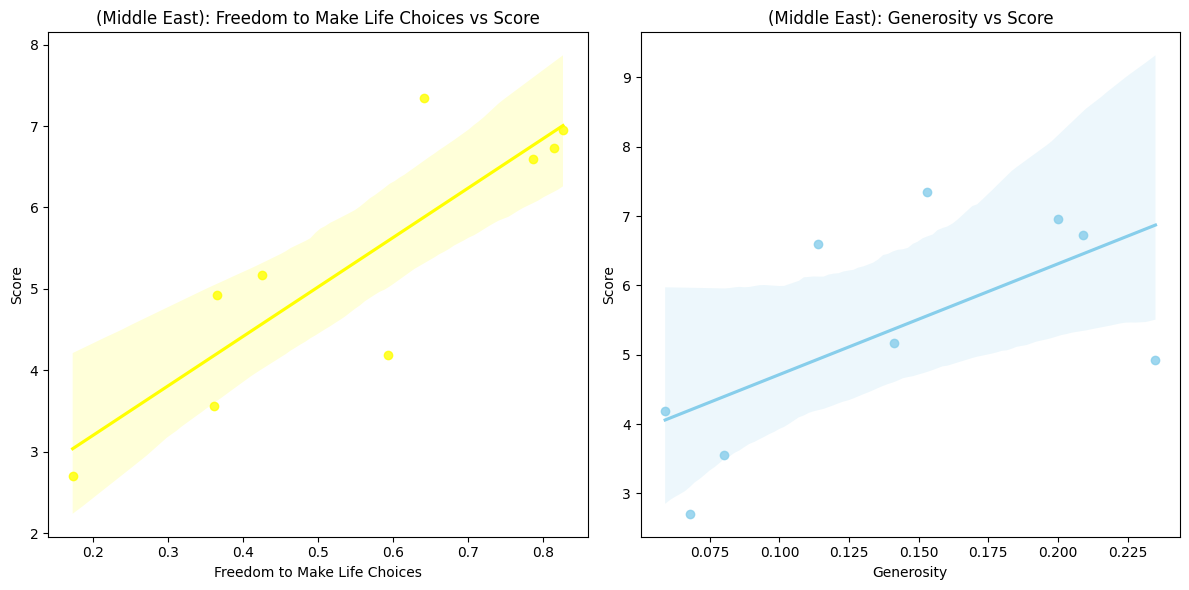

In [88]:
# 5. Correlation Analysis:
#• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
#Generosity within each region.

correlation_south_asia=df2[['score', 'Freedom to make life choices', 'Generosity']].corr()['score']
print("THE correlation between Freedom to Make Life Choices and Generosity with the Score in south aisa : ")
print(correlation_south_asia)

correlation_middle_east=df3[['score', 'Freedom to make life choices', 'Generosity']].corr()['score']
print("THE correlation between Freedom to Make Life Choices and Generosity with the Score in the middle east : ")
print(correlation_middle_east)

#• Create scatter plots to visualize and interpret the relationships.
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=df2, color='green', ci=95)
plt.title('(South Asia): Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=df2, color='red', ci=95)
plt.title('(South Asia): Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=df3, color='yellow', ci=95)
plt.title('(Middle East): Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=df3, color='skyblue', ci=95)
plt.title('(Middle East): Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


Discussion of Outlier Findings:

In South Asia, outliers in Score reveal a country with notably lower well-being, potentially due to economic instability or sociopolitical challenges. Similarly, outliers in GDP per Capita indicate significant disparities in economic development, with certain countries experiencing far lower income levels than the regional average. These findings highlight the need for targeted interventions to address inequality and improve economic opportunities.


South Asia Outliers (Score):
['Afghanistan']

South Asia Outliers (GDP per Capita):
['Afghanistan']

Middle East Outliers (Score):
[]

Middle East Outliers (GDP per Capita):
[]


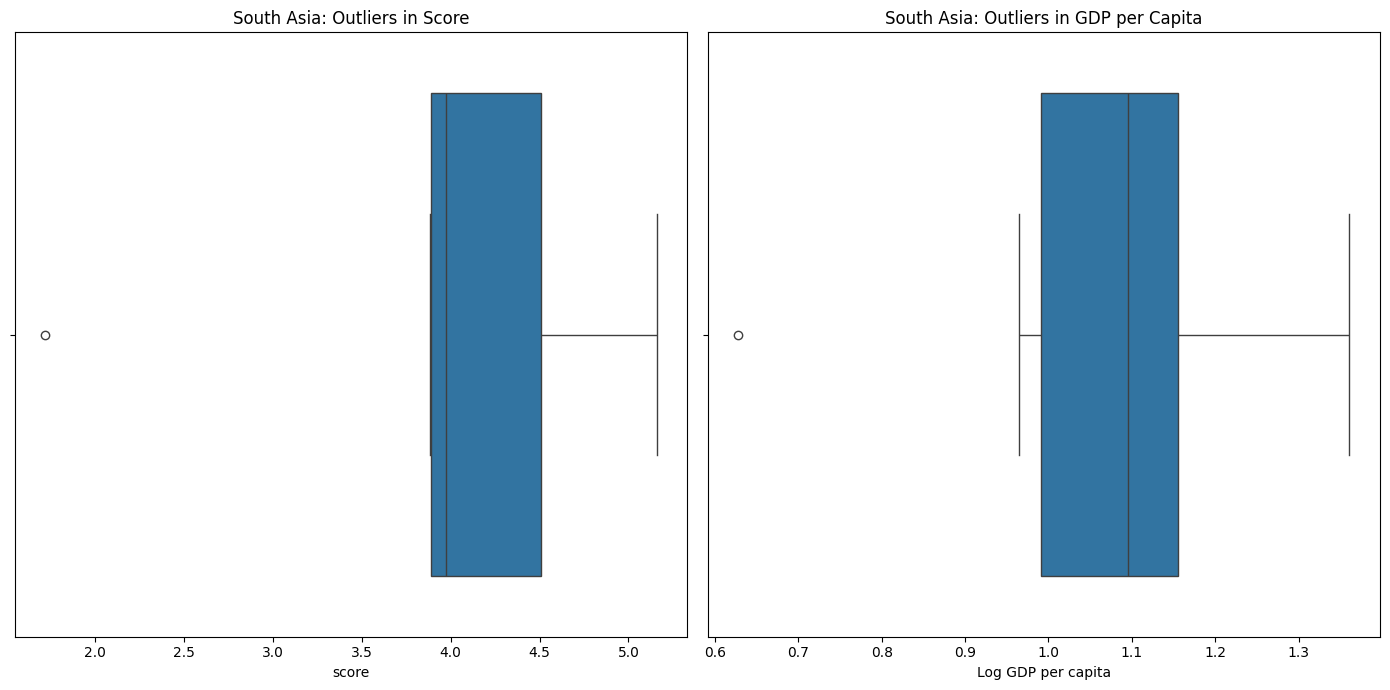

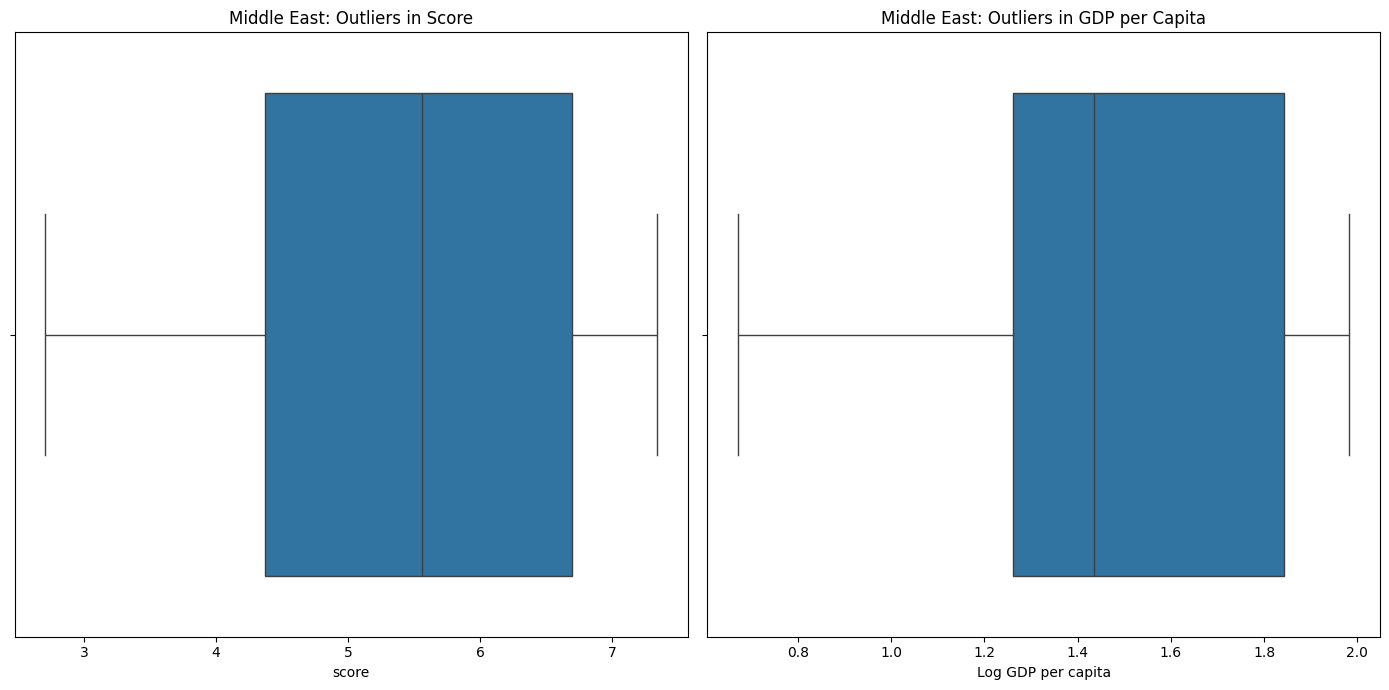

In [73]:
#6. Outlier Detection:
#• Identify outlier countries in both regions based on Score and GDP per Capita.
south_asia_outliers_score = df2[(df2['score'] < df2['score'].quantile(0.25) - 1.5 * (df2['score'].quantile(0.75) - df2['score'].quantile(0.25))) |
                                            (df2['score'] > df2['score'].quantile(0.75) + 1.5 * (df2['score'].quantile(0.75) - df2['score'].quantile(0.25)))]

south_asia_outliers_gdp = df2[(df2['Log GDP per capita'] < df2['Log GDP per capita'].quantile(0.25) - 1.5 * (df2['Log GDP per capita'].quantile(0.75) - df2['Log GDP per capita'].quantile(0.25))) |
                                           (df2['Log GDP per capita'] > df2['Log GDP per capita'].quantile(0.75) + 1.5 * (df2['Log GDP per capita'].quantile(0.75) - df2['Log GDP per capita'].quantile(0.25)))]

middle_east_outliers_score = df3[(df3['score'] < df3['score'].quantile(0.25) - 1.5 * (df3['score'].quantile(0.75) - df3['score'].quantile(0.25))) |
                                             (df3['score'] > df3['score'].quantile(0.75) + 1.5 * (df3['score'].quantile(0.75) - df3['score'].quantile(0.25)))]

middle_east_outliers_gdp = df3[(df3['Log GDP per capita'] < df3['Log GDP per capita'].quantile(0.25) - 1.5 * (df3['Log GDP per capita'].quantile(0.75) - df3['Log GDP per capita'].quantile(0.25))) |
                                            (df3['Log GDP per capita'] > df3['Log GDP per capita'].quantile(0.75) + 1.5 * (df3['Log GDP per capita'].quantile(0.75) - df3['Log GDP per capita'].quantile(0.25)))]

# South Asia: Outliers based on score
print("South Asia Outliers (Score):")
print(south_asia_outliers_score['Country name'].unique())

# South Asia: Outliers based on GDP per Capita
print("\nSouth Asia Outliers (GDP per Capita):")
print(south_asia_outliers_gdp['Country name'].unique())

# Middle East: Outliers based on score
print("\nMiddle East Outliers (Score):")
print(middle_east_outliers_score['Country name'].unique())

# Middle East: Outliers based on GDP per Capita
print("\nMiddle East Outliers (GDP per Capita):")
print(middle_east_outliers_gdp['Country name'].unique())

#• Plot these outliers and discuss their implications.
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x=df2['score'])
plt.title('South Asia: Outliers in Score')

plt.subplot(1, 2, 2)
sns.boxplot(x=df2['Log GDP per capita'])
plt.title('South Asia: Outliers in GDP per Capita')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x=df3['score'])
plt.title('Middle East: Outliers in Score')

plt.subplot(1, 2, 2)
sns.boxplot(x=df3['Log GDP per capita'])
plt.title('Middle East: Outliers in GDP per Capita')

plt.tight_layout()
plt.show()

<ipython-input-89-7d4a91e4a748>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(palette='plasma',x='Region', y='score', data=pd.concat([df2.assign(Region='South Asia'), df3.assign(Region='Middle East')]))


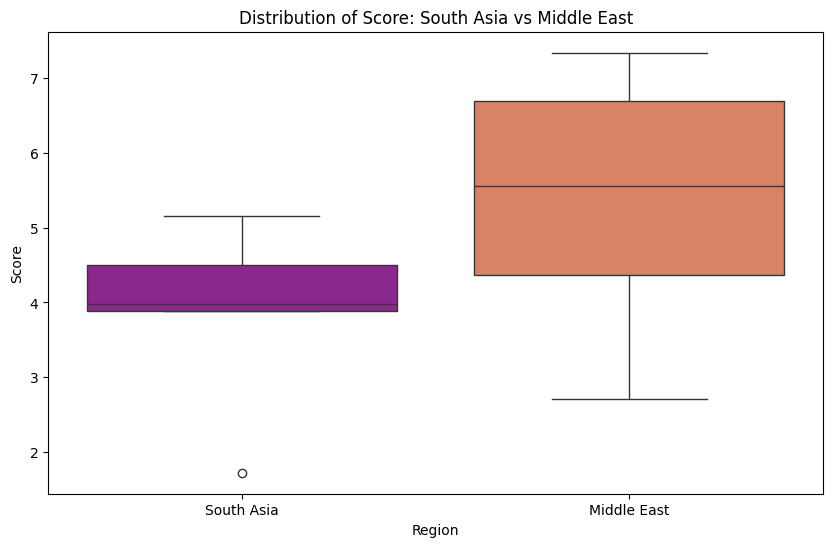

In [89]:
#7 Visualization
# • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
plt.figure(figsize=(10, 6))
sns.boxplot(palette='plasma',x='Region', y='score', data=pd.concat([df2.assign(Region='South Asia'), df3.assign(Region='Middle East')]))
plt.title('Distribution of Score: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()